### dataset Link
https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil/

ther's no descrpition about columns , so let's explore the dataset

# 1.Importing things

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "lines.markerfacecolor" on line 11 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.markeredgecolor" on line 12 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# 2.Loading Dataset and understanding the Datatypes 

In [2]:
df = pd.read_csv("amazon.csv" , encoding="ISO-8859-1" , index_col=None)

In [3]:
df.head()

year state    month  number        date
0  1998  Acre  Janeiro     0.0  1998-01-01
1  1999  Acre  Janeiro     0.0  1999-01-01
2  2000  Acre  Janeiro     0.0  2000-01-01
3  2001  Acre  Janeiro     0.0  2001-01-01
4  2002  Acre  Janeiro     0.0  2002-01-01

## Summary about the dataset: Year , State: Month: "in Portuguese" , Number , Date

In [4]:
# Get the unique months , and translate to English
df.month.value_counts()

Janeiro      541
Maio         540
Março        540
Abril        540
Fevereiro    540
Novembro     540
Setembro     540
Julho        540
Agosto       540
Junho        540
Outubro      540
Dezembro     513
Name: month, dtype: int64

In [5]:
month_dict = {
"janeiro":"Jan",
"fevereiro":"Feb",
"março":"Mar",
"abril":"Apr",
"maio":"May",
"junho":"Jun",
"julho":"Jul",
"agosto":"Aug",
"setembro":"Sep",
"outubro":"Oct",
"novembro":"Nov",
"dezembro":"Dec",
}


df.month = df.month.str.lower().map(month_dict )

In [6]:
df.head()

year state month  number        date
0  1998  Acre   Jan     0.0  1998-01-01
1  1999  Acre   Jan     0.0  1999-01-01
2  2000  Acre   Jan     0.0  2000-01-01
3  2001  Acre   Jan     0.0  2001-01-01
4  2002  Acre   Jan     0.0  2002-01-01

## Describing and filling NaN

In [7]:
df.drop_duplicates()

year      state month  number        date
0     1998       Acre   Jan     0.0  1998-01-01
1     1999       Acre   Jan     0.0  1999-01-01
2     2000       Acre   Jan     0.0  2000-01-01
3     2001       Acre   Jan     0.0  2001-01-01
4     2002       Acre   Jan     0.0  2002-01-01
...    ...        ...   ...     ...         ...
6449  2012  Tocantins   Dec   128.0  2012-01-01
6450  2013  Tocantins   Dec    85.0  2013-01-01
6451  2014  Tocantins   Dec   223.0  2014-01-01
6452  2015  Tocantins   Dec   373.0  2015-01-01
6453  2016  Tocantins   Dec   119.0  2016-01-01

[6422 rows x 5 columns]

In [8]:
df.describe()

year       number
count  6454.000000  6454.000000
mean   2007.461729   108.293163
std       5.746654   190.812242
min    1998.000000     0.000000
25%    2002.000000     3.000000
50%    2007.000000    24.000000
75%    2012.000000   113.000000
max    2017.000000   998.000000

In [9]:
df.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

In [10]:
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

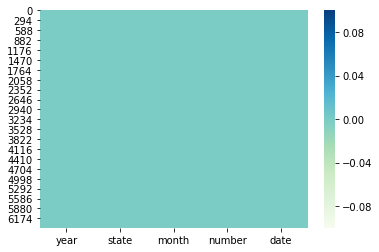

In [11]:
sns.heatmap(df.isna() ,cmap="GnBu")

# 3. Dataset Walkin 

## Getting data with some random index

In [12]:
df[30:40]

year state month  number        date
30  2008  Acre   Feb     0.0  2008-01-01
31  2009  Acre   Feb     2.0  2009-01-01
32  2010  Acre   Feb     0.0  2010-01-01
33  2011  Acre   Feb     0.0  2011-01-01
34  2012  Acre   Feb     0.0  2012-01-01
35  2013  Acre   Feb     0.0  2013-01-01
36  2014  Acre   Feb     0.0  2014-01-01
37  2015  Acre   Feb     2.0  2015-01-01
38  2016  Acre   Feb     5.0  2016-01-01
39  2017  Acre   Feb     1.0  2017-01-01

In [13]:
df.size

32270

In [14]:
df[3225:]

year      state month  number        date
3225  2015       Pará   Jun   265.0  2015-01-01
3226  2016       Pará   Jun   502.0  2016-01-01
3227  2017       Pará   Jun   679.0  2017-01-01
3228  1998       Pará   Jul   638.0  1998-01-01
3229  1999       Pará   Jul   982.0  1999-01-01
...    ...        ...   ...     ...         ...
6449  2012  Tocantins   Dec   128.0  2012-01-01
6450  2013  Tocantins   Dec    85.0  2013-01-01
6451  2014  Tocantins   Dec   223.0  2014-01-01
6452  2015  Tocantins   Dec   373.0  2015-01-01
6453  2016  Tocantins   Dec   119.0  2016-01-01

[3229 rows x 5 columns]

## Getting random samples

In [15]:
df.sample(n=30)

year             state month   number        date
3391  2002           Paraiba   Mar    3.000  2002-01-01
4133  2007              Piau   Apr    9.000  2007-01-01
1186  2007             Bahia   Dec  259.000  2007-01-01
4941  1998               Rio   Sep   60.000  1998-01-01
952   2012          Amazonas   Dec   80.000  2012-01-01
4302  2016              Piau   Dec  374.000  2016-01-01
5238  2016          Rondonia   Nov  401.000  2016-01-01
6441  2004         Tocantins   Dec   96.000  2004-01-01
1049  2010             Bahia   May  198.000  2010-01-01
2071  2016             Goias   Aug    1.032  2016-01-01
1002  2003             Bahia   Mar  274.000  2003-01-01
3121  2011              Pará   Jan  108.000  2011-01-01
5102  2000          Rondonia   May   13.000  2000-01-01
4775  2011               Rio   Dec  125.000  2011-01-01
3381  2012           Paraiba   Feb   15.000  2012-01-01
3206  2016              Pará   May  154.000  2016-01-01
5903  2004         Sao Paulo   Sep  809.000  2004-01-01
5524  2004    Santa Catarina   Feb   29.000  2004-01-01
5292  2011           Roraima   Feb  112.000  2011-01-01
6085  2007           Sergipe   Jun    0.000  2007-01-01
5067  2005          Rondonia   Mar   17.000  2005-01-01
2602  2009       Mato Grosso   Nov  588.000  2009-01-01
2441  2008       Mato Grosso   Mar  180.000  2008-01-01
5546  2006    Santa Catarina   Mar   48.000  2006-01-01
1637  2000  Distrito Federal   Nov    0.000  2000-01-01
3278  2008              Pará   Sep    6.294  2008-01-01
5141  1999          Rondonia   Jul  135.000  1999-01-01
476   2014           Alagoas   Dec   24.000  2014-01-01
3295  2005              Pará   Oct    5.083  2005-01-01
1340  2002             Ceara   Aug  111.000  2002-01-01

## Plotting the Some Random Samples

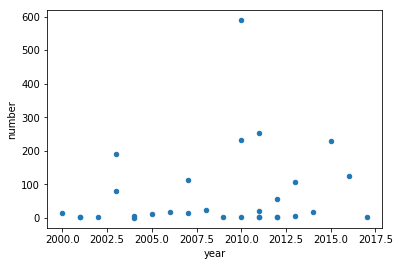

In [16]:
df.sample(n=30).plot.scatter(x="year" , y="number" , )

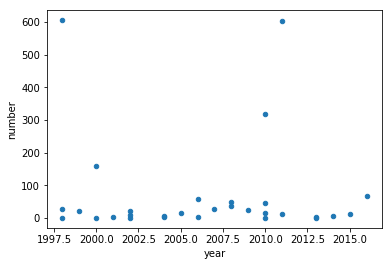

In [17]:
df.sample(n=30).plot.scatter(x="year" , y="number" , )

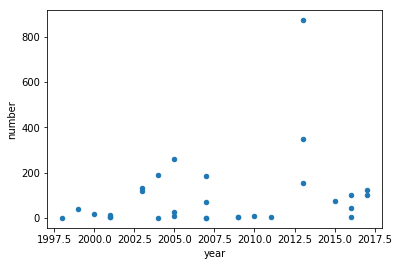

In [18]:
df.sample(n=30).plot.scatter(x="year" , y="number" , )

## Points to notice 

----------*---------------

In [19]:
df[677:678]

year  state month  number        date
677  2016  Amapa   Oct   793.0  2016-01-01

**1) Point** <br>
date vs year and month : <br>
    Notice that month == "Oct" , year == "2016" but date="2016-01-01" , how is that Possibile it's like pre-planed for the forest fire in that year  :<br>
        So we have two options here:<br>
            1)Update the date column (Bad Option);<br>
            2)Drop the Date column , because we seperately have month and year and month/day seems always = 1 (Good Option)<br> 

In [20]:
df[677:678]

year  state month  number        date
677  2016  Amapa   Oct   793.0  2016-01-01

------------*-----------------------

In [21]:
df[1376:1377]

year  state month  number        date
1376  1998  Ceara   Oct   1.014  1998-01-01

**2)Point** <br>
number in float / decimal [1.014] , we don't have the decription for the data but we can assume that it will be no.of times fired in forests ,  <br>
But the numbers in [1.014] decimal. <br>
1)we have two options round it  <br>
2)or keep it as it is <br>


In [22]:
df[1376:1377]

year  state month  number        date
1376  1998  Ceara   Oct   1.014  1998-01-01

------------*------------

# 4.EDA

In [23]:
import matplotlib.style as style

In [24]:
style.use("fivethirtyeight")
# style.available

In [25]:
df.head()

year state month  number        date
0  1998  Acre   Jan     0.0  1998-01-01
1  1999  Acre   Jan     0.0  1999-01-01
2  2000  Acre   Jan     0.0  2000-01-01
3  2001  Acre   Jan     0.0  2001-01-01
4  2002  Acre   Jan     0.0  2002-01-01

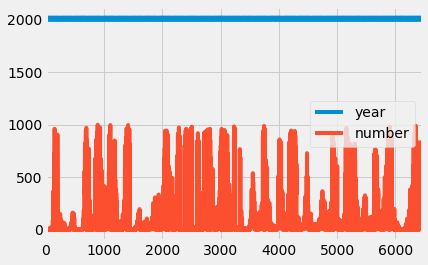

In [26]:
df.plot()

## 4.1 Analaysing single variable 

### Analysing Year

#### Analysing Year with normalize 

In [27]:
df.year.value_counts(normalize=True , sort=False).sort_index()

1998    0.050201
1999    0.050201
2000    0.050201
2001    0.050201
2002    0.050201
2003    0.050201
2004    0.050201
2005    0.050201
2006    0.050201
2007    0.050201
2008    0.050201
2009    0.050201
2010    0.050201
2011    0.050201
2012    0.050201
2013    0.050201
2014    0.050201
2015    0.050201
2016    0.050201
2017    0.046173
Name: year, dtype: float64

In [28]:
df.year.value_counts(normalize=True , sort=False).sort_index().values

array([0.05020143, 0.05020143, 0.05020143, 0.05020143, 0.05020143,
       0.05020143, 0.05020143, 0.05020143, 0.05020143, 0.05020143,
       0.05020143, 0.05020143, 0.05020143, 0.05020143, 0.05020143,
       0.05020143, 0.05020143, 0.05020143, 0.05020143, 0.04617292])

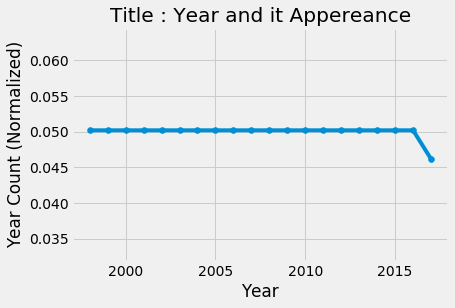

In [29]:
# Scatter plot
plt.title("Title : Year and it Appereance")
plt.xlabel("Year")
plt.ylabel("Year Count (Normalized)")
plt.scatter( df.year.value_counts(normalize=True).sort_index().index, df.year.value_counts(normalize=True).sort_index().values)
plt.plot( df.year.value_counts(normalize=True).sort_index().index, df.year.value_counts(normalize=True).sort_index().values)
plt.show()

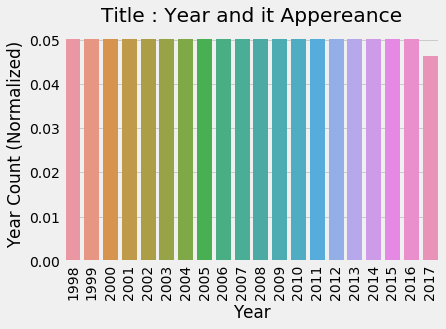

In [30]:
# Bar plot
plt.title("Title : Year and it Appereance")
sns.barplot(x = df.year.value_counts(normalize=True , sort=False).sort_index().index , y =  df.year.value_counts(normalize=True , sort=False).sort_index().values ,)
plt.xlabel("Year")
plt.ylabel("Year Count (Normalized)")
plt.xticks(rotation=90)
plt.show()

#### Analysing Year withot normalize 

In [31]:
df.year.value_counts(sort=False).sort_index()

1998    324
1999    324
2000    324
2001    324
2002    324
2003    324
2004    324
2005    324
2006    324
2007    324
2008    324
2009    324
2010    324
2011    324
2012    324
2013    324
2014    324
2015    324
2016    324
2017    298
Name: year, dtype: int64

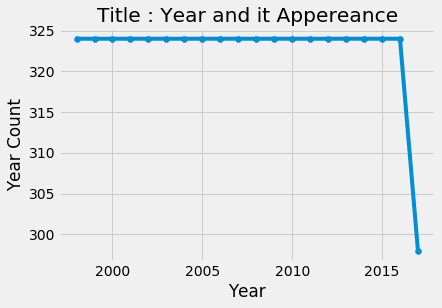

In [32]:
# Scatter plot
plt.title("Title : Year and it Appereance")
plt.xlabel("Year")
plt.ylabel("Year Count")
plt.scatter( df.year.value_counts(normalize=False).sort_index().index, df.year.value_counts(normalize=False).sort_index().values)
plt.plot( df.year.value_counts(normalize=False).sort_index().index, df.year.value_counts(normalize=False).sort_index().values)
plt.show()

#### About Year Column

In [33]:
df.year.min()

1998

In [34]:
df.year.max()

2017

After analaysing the Year Column <br>  , All the year from 1998 - 2016 are recored int the same amount <br> , which means it may have fires in the forest <br> , But 2017 have less amount than other years <br> may be 2017 is good year for the Amazon 

### Analysing State

#### Analysing State

In [35]:
df.state.value_counts()

Rio                 717
Mato Grosso         478
Paraiba             478
Alagoas             240
Maranhao            239
Espirito Santo      239
Pará                239
Acre                239
Amazonas            239
Goias               239
Santa Catarina      239
Amapa               239
Pernambuco          239
Sao Paulo           239
Rondonia            239
Sergipe             239
Roraima             239
Tocantins           239
Ceara               239
Piau                239
Minas Gerais        239
Distrito Federal    239
Bahia               239
Name: state, dtype: int64

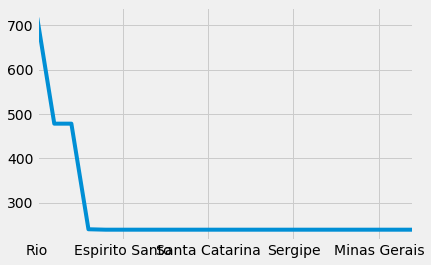

In [36]:
df.state.value_counts().plot()

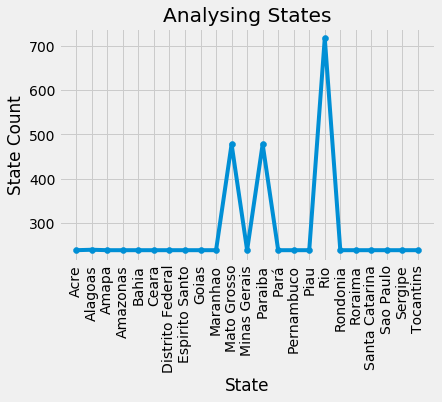

In [37]:
plt.title("Analysing States")
plt.xlabel("State")
plt.ylabel("State Count")
plt.scatter( df.state.value_counts(normalize=False).sort_index().index, df.state.value_counts(normalize=False).sort_index().values)
plt.plot( df.state.value_counts(normalize=False).sort_index().index, df.state.value_counts(normalize=False).sort_index().values)
plt.xticks(rotation=90)
plt.show()

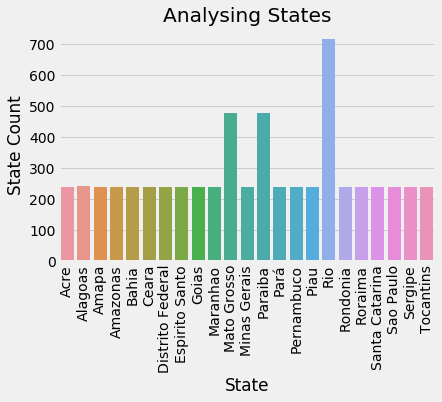

In [38]:
plt.title("Analysing States")
plt.xlabel("State")
plt.ylabel("State Count")
sns.barplot( x = df.state.value_counts(normalize=False).sort_index().index,  y = df.state.value_counts(normalize=False).sort_index().values)
plt.xticks(rotation=90)
plt.show()

#### About State

---------------------------
Rio           |      717 <br>
Paraiba       |      478 <br>
Mato Grosso   |      478 <br>

------------------------------
These states are mostly affecting by amazon than other states

### Analaysing Month

In [39]:
df.month.value_counts()

Jan    541
Jun    540
Sep    540
Feb    540
Nov    540
Aug    540
Apr    540
Jul    540
May    540
Mar    540
Oct    540
Dec    513
Name: month, dtype: int64

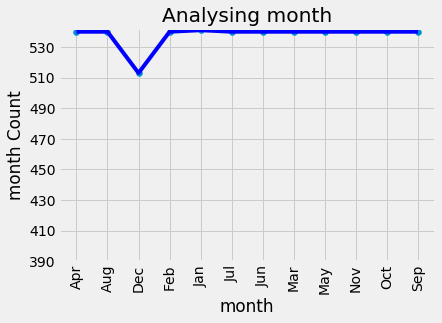

In [40]:
plt.title("Analysing month")
plt.xlabel("month")
plt.ylabel("month Count")
plt.scatter( df.month.value_counts(normalize=False).sort_index().index, df.month.value_counts(normalize=False).sort_index().values)
plt.plot( df.month.value_counts(normalize=False).sort_index().index, df.month.value_counts(normalize=False).sort_index().values , c='b')
plt.xticks(rotation=90)
plt.yticks(np.arange(390 , 550 , step=20 ))
plt.show()

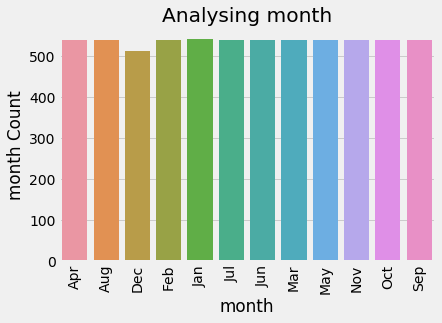

In [41]:
plt.title("Analysing month")
plt.xlabel("month")
plt.ylabel("month Count")
sns.barplot( x = df.month.value_counts(normalize=False).sort_index().index,  y = df.month.value_counts(normalize=False).sort_index().values)
plt.xticks(rotation=90)
plt.show()

#### About Month 

It seems December is having low count <br> comparing too other but not that much right becasue only 20 <br> count is different , may because of snow-fall the amazon forest haven't affected by fire

### Analaysing Numbers

**Remeber we have talked about Number in section 3 Dataset Walkin** <br> we don't know what it is , <br> we don't know why it's here , <br> **Lets explore and find out** 

In [42]:
df.number.value_counts()

0.000      617
1.000      237
2.000      174
3.000      143
4.000      115
          ... 
1.461        1
6.316        1
5.882        1
572.000      1
6.326        1
Name: number, Length: 1479, dtype: int64

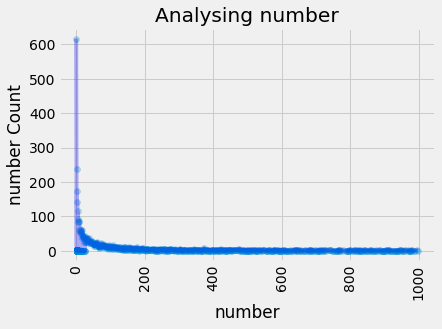

In [43]:
plt.title("Analysing number")
plt.xlabel("number")
plt.ylabel("number Count")
plt.scatter( df.number.value_counts(normalize=False).sort_index().index, df.number.value_counts(normalize=False).sort_index().values , alpha=0.3,)
plt.plot( df.number.value_counts(normalize=False).sort_index().index, df.number.value_counts(normalize=False).sort_index().values  , alpha=0.3, c='b')
plt.xticks(rotation=90)
plt.show()

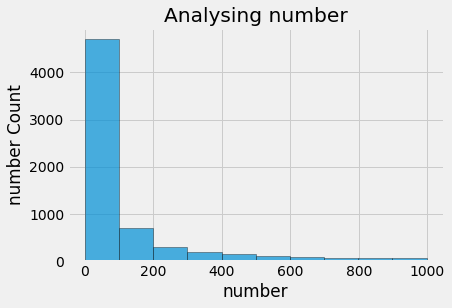

In [44]:

plt.title("Analysing number")
plt.xlabel("number")
plt.ylabel("number Count")
plt.hist(df.number, alpha=0.7 ,edgecolor='black')
plt.show()

#### About Numbers

So one thing i noticed when number < 50 , it's more occured  , i agree with that but what that it means. Ok lets consider this is a count of fire occured in that month but how it will occure 700 times in month  , 900 times ther's lot i have take the number columns may be it just have some outlies need to fix those things but not now. Let's move to next step

In [45]:
df.head()

year state month  number        date
0  1998  Acre   Jan     0.0  1998-01-01
1  1999  Acre   Jan     0.0  1999-01-01
2  2000  Acre   Jan     0.0  2000-01-01
3  2001  Acre   Jan     0.0  2001-01-01
4  2002  Acre   Jan     0.0  2002-01-01

## 4.2 Analaysing two variables

In [46]:
# style.available

In [47]:
df.head()

year state month  number        date
0  1998  Acre   Jan     0.0  1998-01-01
1  1999  Acre   Jan     0.0  1999-01-01
2  2000  Acre   Jan     0.0  2000-01-01
3  2001  Acre   Jan     0.0  2001-01-01
4  2002  Acre   Jan     0.0  2002-01-01

### Year vs Number

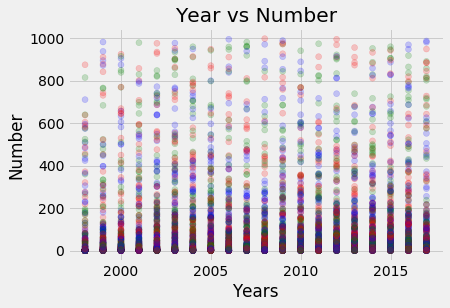

In [48]:

plt.title("Year vs Number")
plt.xlabel("Years")
plt.ylabel("Number")
plt.scatter(df.year , df.number , alpha=0.2 , color= ['red' , 'blue' , 'green'])
plt.show()

### State vs Year

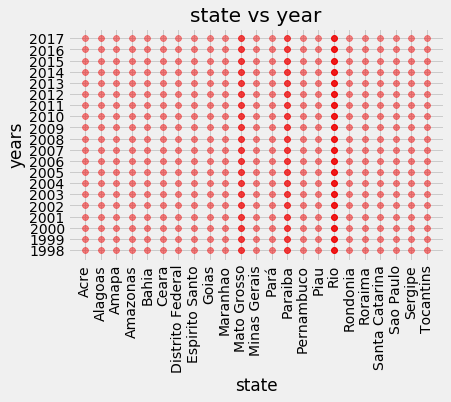

In [49]:

plt.title("state vs year")
plt.xlabel("state")
plt.ylabel("years")
plt.scatter(df.state , df.year , alpha=0.05 , color= 'red' )
plt.xticks(rotation=90)
plt.yticks(np.arange(1998,2018,step=1))
plt.show()

### Year vs Month

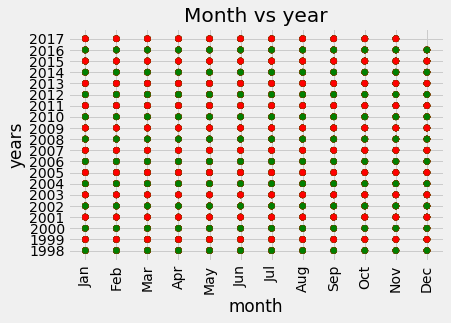

In [50]:
plt.title("Month vs year")
plt.xlabel("month")
plt.ylabel("years")
plt.scatter(df.month , df.year , color= ['red','green'] )
plt.xticks(rotation=90)
plt.yticks(np.arange(1998,2018,step=1))
plt.show()

In [51]:
df.query("year == 2017 and month== 'Dec'")

Empty DataFrame
Columns: [year, state, month, number, date]
Index: []

### State vs Month

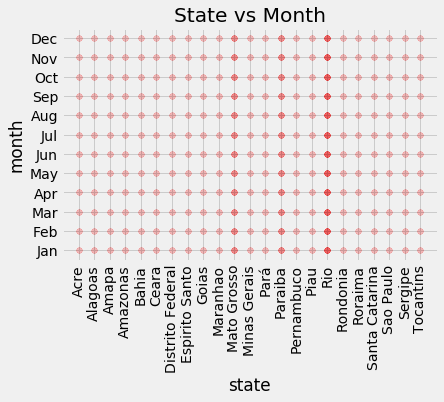

In [52]:
plt.title("State vs Month")
plt.xlabel("state")
plt.ylabel("month")
plt.scatter(df.state , df.month  , alpha=0.01 , c="r")
plt.xticks(rotation=90)
# plt.yticks(np.arange(1998,2018,step=1))
plt.show()

### State vs Number

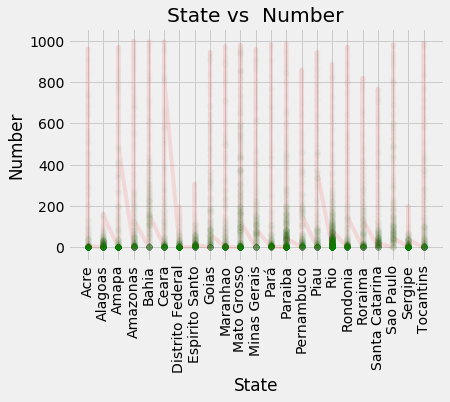

In [53]:

plt.title("State vs  Number")
plt.xlabel("State")
plt.ylabel("Number")
plt.plot(df.state , df.number , alpha=.1 , color= 'red')

plt.scatter(df.state , df.number , alpha=.01 , color= 'green')
plt.xticks(rotation=90)

plt.show()

## 4.3 Multivariable Analysis

In [54]:
import plotly.express as px


In [55]:
import random

def genrate_colors(number_of_colors=23):
#     number_of_colors = 23

    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color
# print(color)

In [56]:
df.head()

year state month  number        date
0  1998  Acre   Jan     0.0  1998-01-01
1  1999  Acre   Jan     0.0  1999-01-01
2  2000  Acre   Jan     0.0  2000-01-01
3  2001  Acre   Jan     0.0  2001-01-01
4  2002  Acre   Jan     0.0  2002-01-01

#### Year and Sate vs Number

In [57]:
df_year_state = df.groupby(["year","state"]).agg({"number":"sum"})

In [58]:
df_year_state.reset_index(inplace=True)

In [59]:
df_year_state

year           state    number
0    1998            Acre   730.000
1    1998         Alagoas    86.000
2    1998           Amapa   278.000
3    1998        Amazonas   946.000
4    1998           Bahia  1224.687
..    ...             ...       ...
455  2017         Roraima  1101.000
456  2017  Santa Catarina  2354.000
457  2017       Sao Paulo  2540.868
458  2017         Sergipe    75.000
459  2017       Tocantins  1378.959

[460 rows x 3 columns]

In [60]:
print(df.state.unique())

['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']


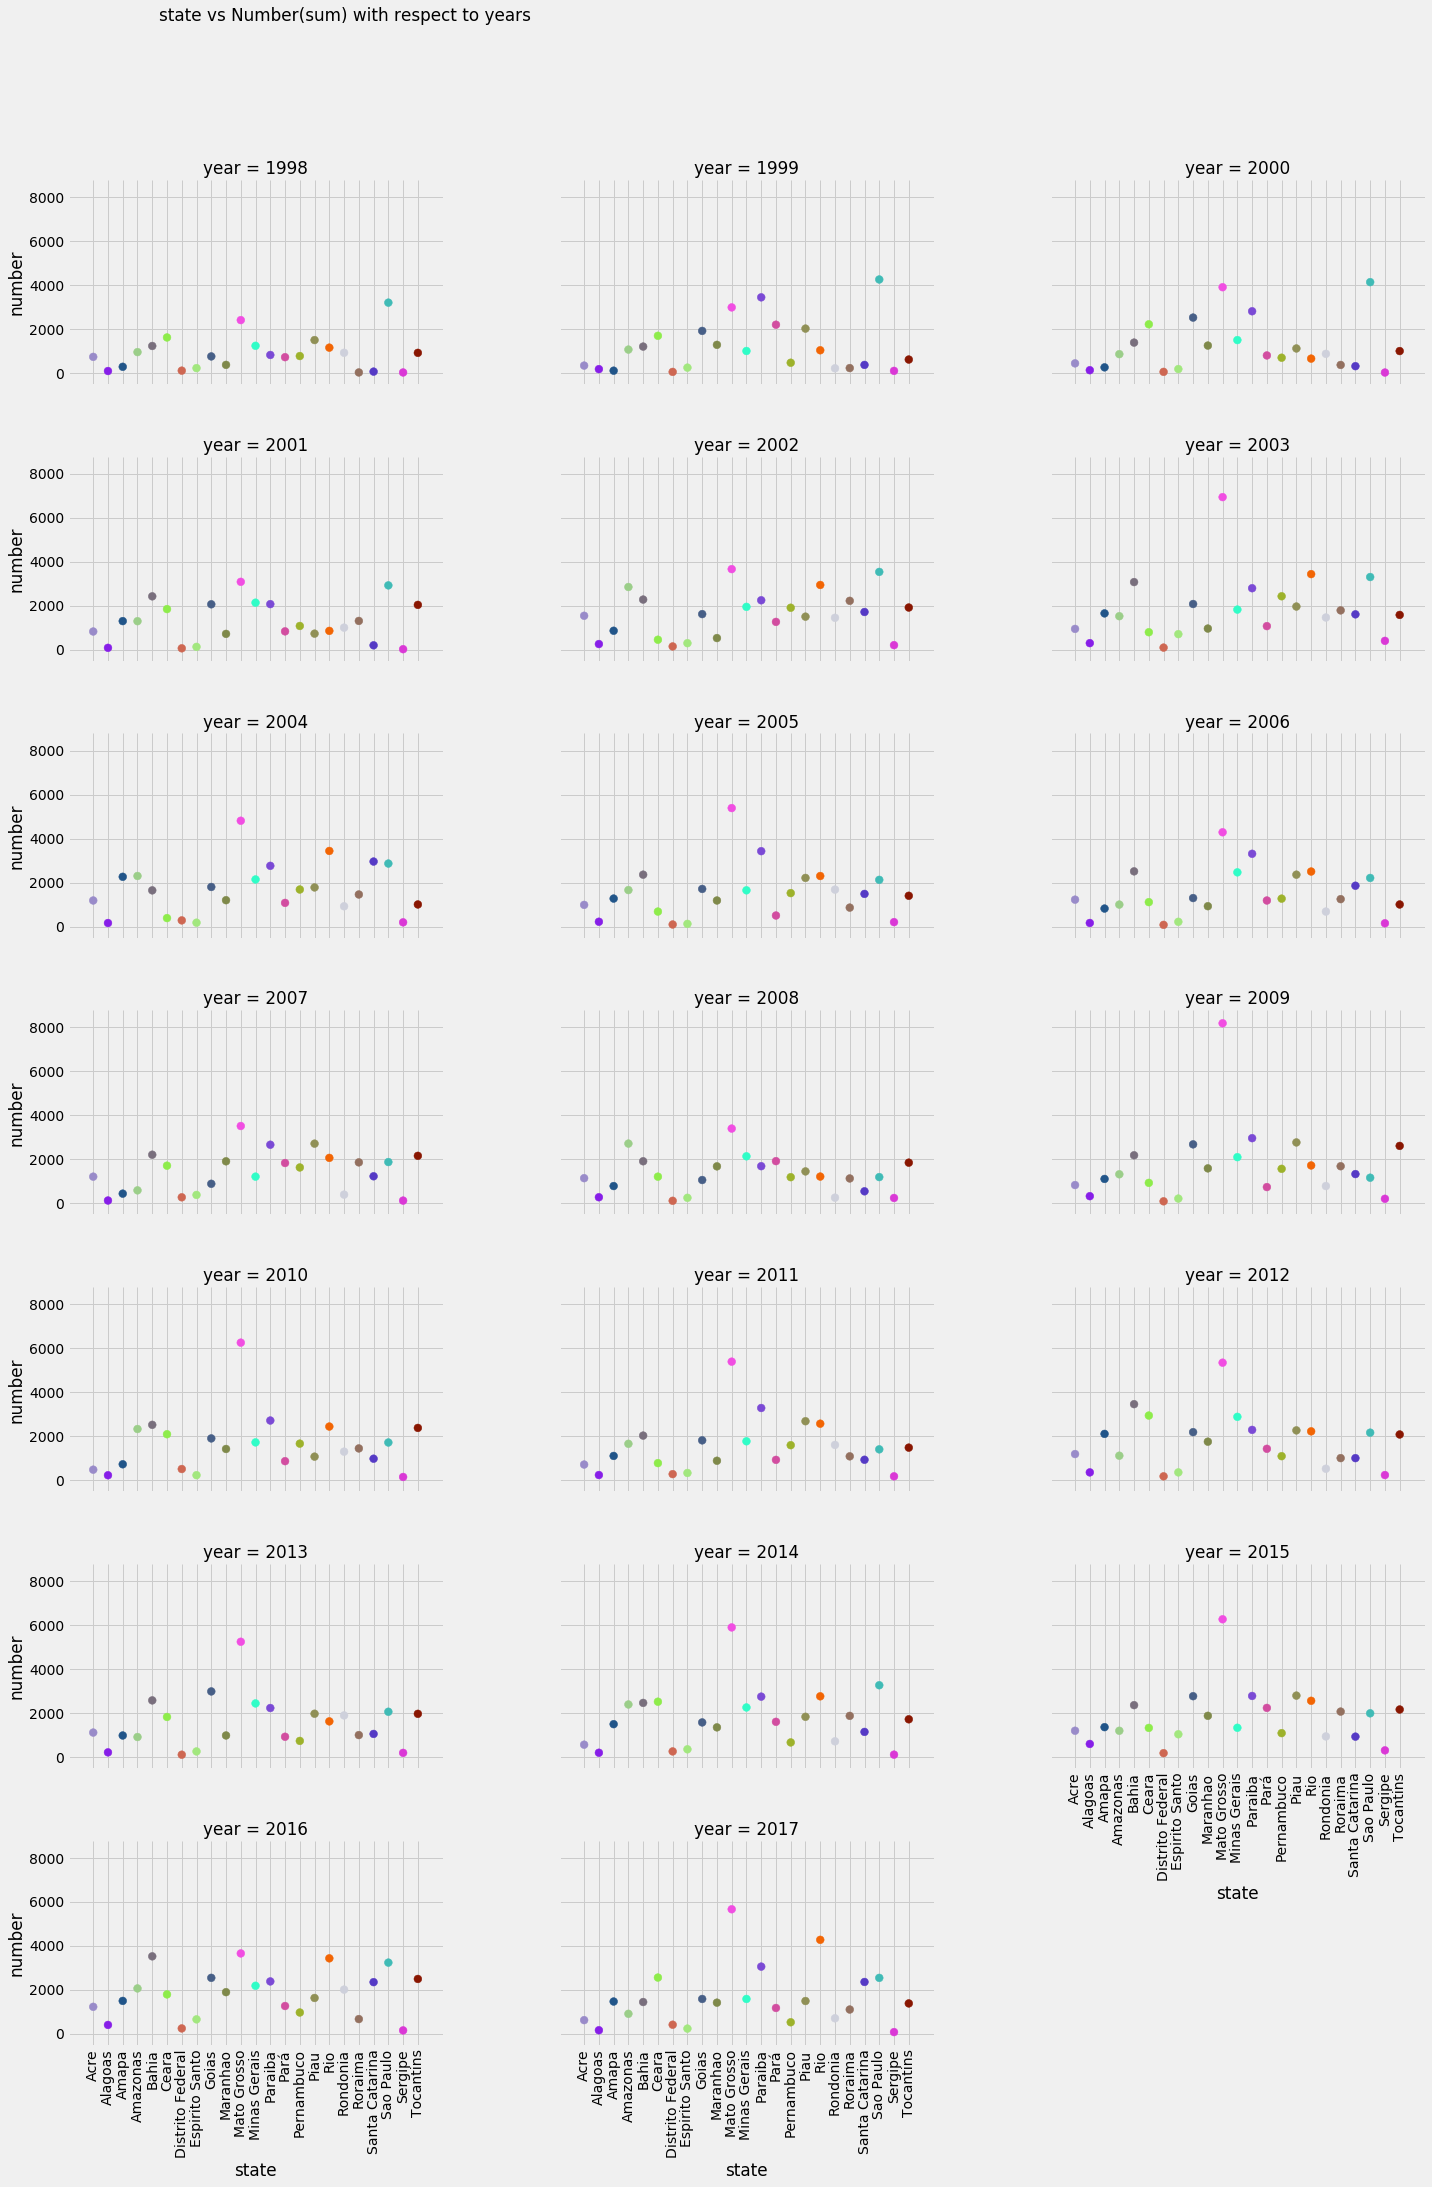

In [61]:
color = genrate_colors(len(df.state.value_counts ()) ,)
g = sns.FacetGrid(data = df_year_state , col="year" , col_wrap=3 ,).add_legend()

g.map(plt.scatter , "state" , "number" , color=color, s=60)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("state vs Number(sum) with respect to years")

g.set_xticklabels(rotation=90)
g.fig.set_size_inches(10,30)
g.fig.subplots_adjust(right=2)
plt.show()

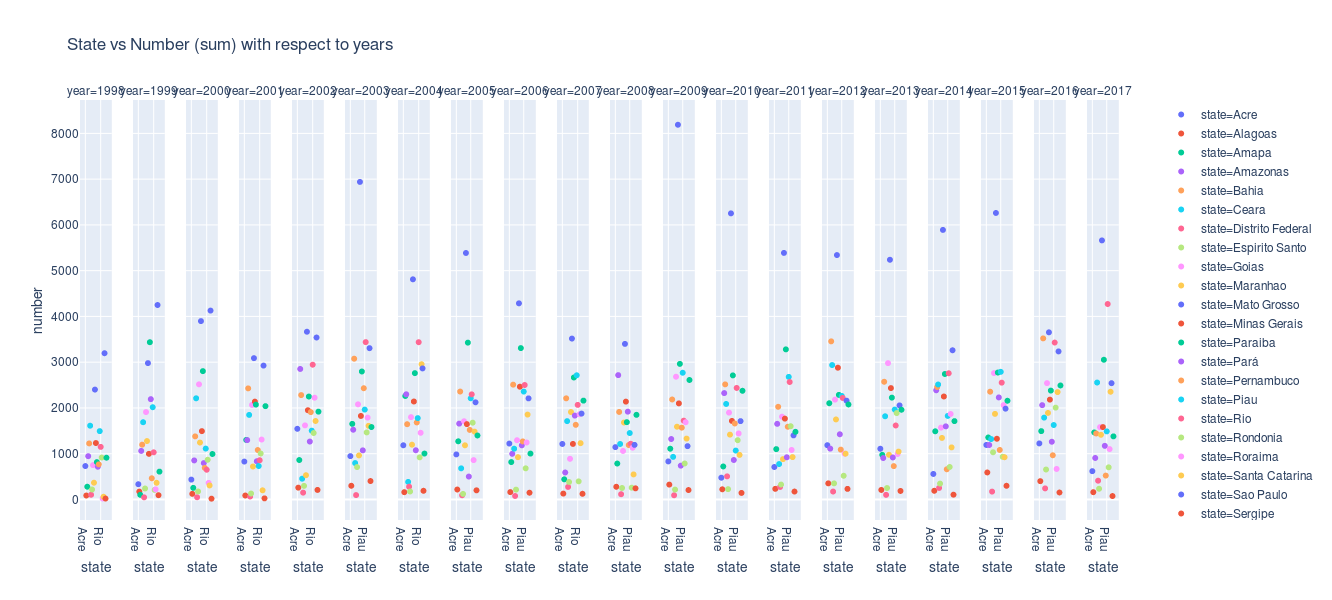

In [62]:
fig = px.scatter(df_year_state, x="state", y="number", facet_col = "year",color="state",width=1500 , title="\t\tState vs Number (sum) with respect to years")
fig.show()

#### year, month ,number

In [63]:
df_year_month = df.groupby(["year","month"]).agg({"number":"sum"})

In [64]:
df_year_month.reset_index(inplace=True)

In [65]:
df_year_month.tail()

year month    number
234  2017   Mar  2017.000
235  2017   May  2506.000
236  2017   Nov  6217.379
237  2017   Oct  3600.159
238  2017   Sep  2779.317

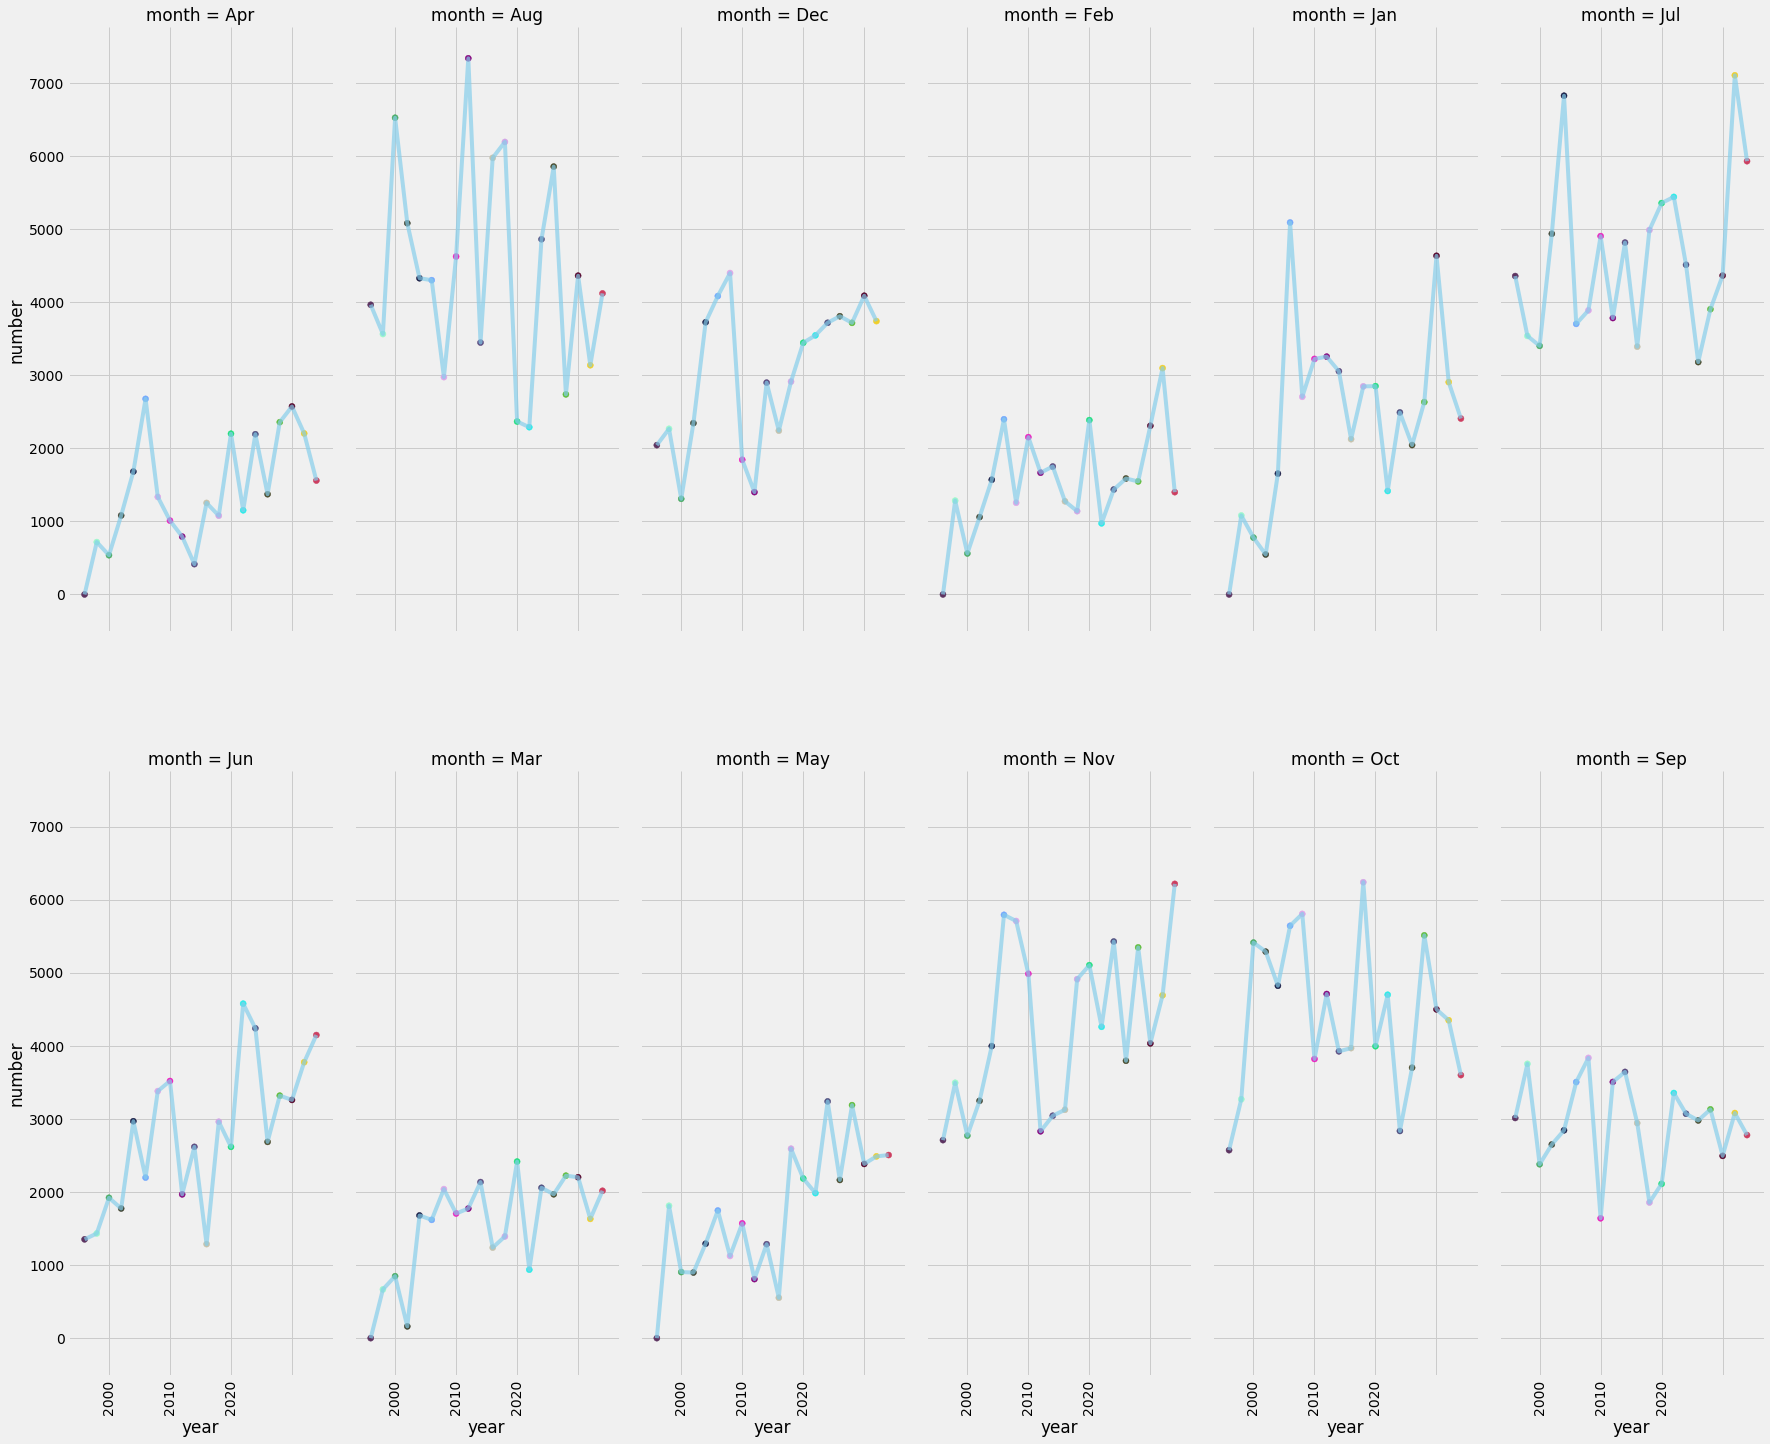

In [67]:
color = genrate_colors(len(df_year_month.year.value_counts()))

g = sns.FacetGrid(data=df_year_month , col="month",col_wrap=6, sharex=True)
g.map(plt.scatter , "year" , "number" , color=color , ).add_legend()
g.map(plt.plot , "year" , "number" , color='skyblue' ,alpha=0.7, )


g.set_xticklabels( rotation=90)
g.fig.set_size_inches(25,10)
g.fig.subplots_adjust(top=2 , right=1)
# plt.show()


In [68]:
df.head()

year state month  number        date
0  1998  Acre   Jan     0.0  1998-01-01
1  1999  Acre   Jan     0.0  1999-01-01
2  2000  Acre   Jan     0.0  2000-01-01
3  2001  Acre   Jan     0.0  2001-01-01
4  2002  Acre   Jan     0.0  2002-01-01

# 5 . Statistical Approach / Data Visualization

In [69]:
df.head()

year state month  number        date
0  1998  Acre   Jan     0.0  1998-01-01
1  1999  Acre   Jan     0.0  1999-01-01
2  2000  Acre   Jan     0.0  2000-01-01
3  2001  Acre   Jan     0.0  2001-01-01
4  2002  Acre   Jan     0.0  2002-01-01

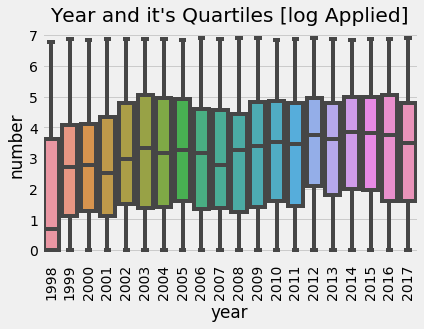

In [91]:
plt.title("Year and it's Quartiles [log Applied]")
sns.boxplot(x=df["year"] , y=np.log(df["number"]+1))
plt.xticks(rotation=90)
plt.show()

#### 2012 is the year that have Q1 -> 2.5  , mean -> 4 , Q3 -> 5 and others having some lower values  / 2014 similar to 2012 

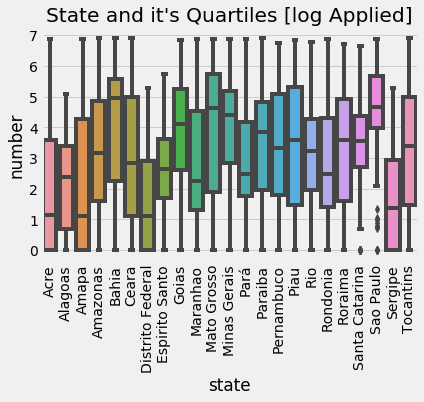

In [90]:
plt.title("State and it's Quartiles [log Applied]")
sns.boxplot(x=df["state"] , y=np.log(df["number"]+1))
plt.xticks(rotation=90)
plt.show()

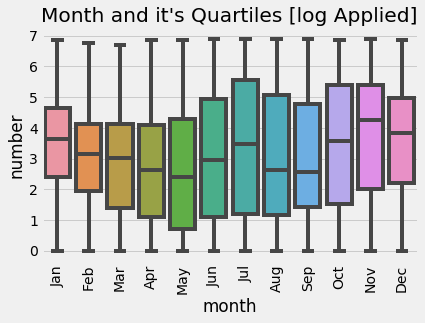

In [89]:
plt.title("Month and it's Quartiles [log Applied]")
sns.boxplot(x=df["month"] , y=np.log(df["number"]+1))
plt.xticks(rotation=90)
plt.show()

#### july have some high fire in a forest among all the month's , so it bad to go trucking / trip to forest's in Brazil in Summer time